 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Read csv file
whale_returns_data = Path("./Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_data, parse_dates=True, index_col="Date")
# Display the first 5 rows of the DataFrame
whale_returns.head()
# Uncomment below to read the entire rows in the file
# whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Check for missing values in the DataFrame
missing_values = whale_returns.isnull().sum()
print(missing_values)
# Drop rows with any missing values
whale_returns_cleaned = whale_returns.dropna()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


In [4]:
# Display the first 5 rows of the DataFrame
whale_returns_cleaned.head()

# Uncomment below to read the entire rows in the file
# whale_returns_cleaned

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_data =Path("./Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_data, parse_dates=True, index_col="Date")
# Uncomment below to display the first 5 rows of the DataFrame
# algo_returns.head()
# Read the entire rows in the file
algo_returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls
missing_algo_values = algo_returns.isnull().sum()
print(missing_algo_values)
# Drop rows with any missing values
algo_returns_cleaned = algo_returns.dropna()

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Display the first 5 rows of the DataFrame
# algo_returns_cleaned.head()

# Uncomment below to read the entire rows in the file
algo_returns_cleaned

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_data=Path("./Resources/sp_tsx_history.csv")
sp_tsx_history = pd.read_csv(sp_tsx_history_data, parse_dates=True, index_col="Date")
sp_tsx_history

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [9]:
# Check Data Types
data_types = sp_tsx_history.dtypes
data_types

Close    object
dtype: object

In [10]:
# Remove the dollar sign and comma from the "Close" column, and convert it to numeric
sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace('[\$,]', '', regex=True).astype(float)

# Verify the data type of the "Close" column
data_types = sp_tsx_history.dtypes
data_types

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
# Daily Return = (Today's Price / Yesterday's Price) - 1
sp_tsx_history["Daily Return"] = sp_tsx_history["Close"].pct_change()
sp_tsx_history

,Close,Daily Return
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [12]:
# Drop nulls
sp_tsx_history.dropna(subset=["Daily Return"], inplace=True)
sp_tsx_history

,Close,Daily Return
Date,,
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
2012-10-09,12273.57,-0.011709
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_history.rename(columns={"Close": "Portfolio Close"}, inplace=True)
sp_tsx_history.head()

,Portfolio Close,Daily Return
Date,,
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
2012-10-09,12273.57,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
# Merge the Whale Returns DataFrame with the Algorithmic Returns DataFrame using a left join on the "Date" column
merged_df = whale_returns.merge(algo_returns, on="Date", how="left")

# Merge the resulting DataFrame with the S&P TSX 60 Returns DataFrame using a left join on the "Date" column
merged_df = merged_df.merge(sp_tsx_history, left_index=True, right_index=True, how="left")

# Rename the columns to be specific to each portfolio
merged_df.rename(columns={
    "SOROS FUND MANAGEMENT LLC": "Whale SOROS",
    "PAULSON & CO.INC. ": "Whale PAULSON",
    "TIGER GLOBAL MANAGEMENT LLC": "Whale TIGER",
    "BERKSHIRE HATHAWAY INC": "Whale BERKSHIRE",
    "Algo 1": "Algo 1",
    "Algo 2": "Algo 2",
    "Close": "S&P TSX 60"
}, inplace=True)

# Drop rows with null values in the merged DataFrame
merged_df = merged_df.dropna()

# Display the resulting DataFrame
merged_df

,Whale SOROS,Whale PAULSON,Whale TIGER,Whale BERKSHIRE,Algo 1,Algo 2,Portfolio Close,Daily Return
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,15133.85,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,15082.84,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,15103.11,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,14952.50,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,14854.49,-0.006555
...,...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,16576.10,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,16613.46,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,16600.37,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [15]:
# Plot daily returns of all portfolios
l_historical_data = Path('./Resources/l_historical.csv')
otex_historical_data = Path('./Resources/otex_historical.csv')
shop_historical_data = Path('./Resources/shop_historical.csv')
sp_tsx_history_data = Path('./Resources/sp_tsx_history.csv')
whale_returns_data = Path('./Resources/whale_returns.csv')
algo_returns_data = Path('./Resources/algo_returns.csv')

l_historical = pd.read_csv(l_historical_data, parse_dates=True, index_col="Date")
otex_historical = pd.read_csv(otex_historical_data, parse_dates=True, index_col="Date")
shop_historical = pd.read_csv(shop_historical_data, parse_dates=True, index_col="Date")
sp_tsx_history = pd.read_csv(sp_tsx_history_data, parse_dates=True, index_col="Date")
whale_returns = pd.read_csv(whale_returns_data, parse_dates=True, index_col="Date")
algo_returns = pd.read_csv(algo_returns_data, parse_dates=True, index_col="Date")

# Check the data type of the "Close" column
close_column_dtype = sp_tsx_history["Close"].dtype

# GOTCHA!!! If it's not already a string, you can directly convert it to float
if not close_column_dtype == 'object':
    sp_tsx_history["Close"] = sp_tsx_history["Close"].astype(float)
else:
    # If it's a string, then remove "$" and ","
    sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate daily returns
l_returns = l_historical['Close'].pct_change().dropna()
otex_returns = otex_historical['Close'].pct_change().dropna()
shop_returns = shop_historical['Close'].pct_change().dropna()
sp_tsx_returns = sp_tsx_history['Close'].pct_change().dropna()
whale_returns = whale_returns.dropna()  # Already contains daily returns
algo_returns = algo_returns.dropna()    # Already contains daily returns


C:\Users\KayLevin\anaconda3\envs\dev\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


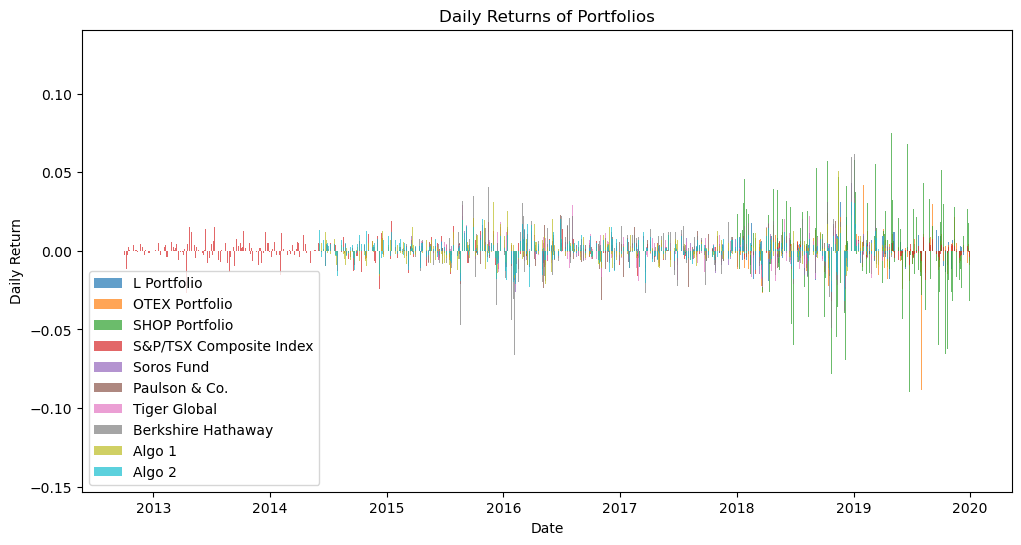

In [16]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# GOTCHA!!! Remove leading and trailing whitespaces from column names
whale_returns.columns = whale_returns.columns.str.strip()

# Plot daily returns for each portfolio as bars
ax.bar(l_returns.index, l_returns, label='L Portfolio', alpha=0.7)
ax.bar(otex_returns.index, otex_returns, label='OTEX Portfolio', alpha=0.7)
ax.bar(shop_returns.index, shop_returns, label='SHOP Portfolio', alpha=0.7)
ax.bar(sp_tsx_returns.index, sp_tsx_returns, label='S&P/TSX Composite Index', alpha=0.7)
ax.bar(whale_returns.index, whale_returns['SOROS FUND MANAGEMENT LLC'], label='Soros Fund', alpha=0.7)
ax.bar(whale_returns.index, whale_returns['PAULSON & CO.INC.'], label='Paulson & Co.', alpha=0.7)
ax.bar(whale_returns.index, whale_returns['TIGER GLOBAL MANAGEMENT LLC'], label='Tiger Global', alpha=0.7)
ax.bar(whale_returns.index, whale_returns['BERKSHIRE HATHAWAY INC'], label='Berkshire Hathaway', alpha=0.7)
ax.bar(algo_returns.index, algo_returns['Algo 1'], label='Algo 1', alpha=0.7)
ax.bar(algo_returns.index, algo_returns['Algo 2'], label='Algo 2', alpha=0.7)

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Daily Return')
ax.set_title('Daily Returns of Portfolios')
ax.legend()

# Show the plot
plt.show()

In [17]:
# Check the data type of the "Close" column
close_column_dtype = sp_tsx_history["Close"].dtype

# GOTCHA!!! If it's not already a string, you can directly convert it to float
if not close_column_dtype == 'object':
    sp_tsx_history["Close"] = sp_tsx_history["Close"].astype(float)
else:
    # If it's a string, then remove "$" and ","
    sp_tsx_history["Close"] = sp_tsx_history["Close"].str.replace('[\$,]', '', regex=True).astype(float)


# Calculate cumulative returns of all portfolios
l_cumulative_returns = (1 + l_historical['Close'].pct_change()).cumprod()
otex_cumulative_returns = (1 + otex_historical['Close'].pct_change()).cumprod()
shop_cumulative_returns = (1 + shop_historical['Close'].pct_change()).cumprod()
sp_tsx_cumulative_returns = (1 + sp_tsx_history['Close'].pct_change()).cumprod()
whale_cumulative_returns = (1 + whale_returns).cumprod() 
algo_cumulative_returns = (1 + algo_returns).cumprod()

# GOTCHA!!! Remove leading and trailing whitespaces from column names
whale_cumulative_returns.columns = whale_cumulative_returns.columns.str.strip()

# Display the last values (final cumulative returns) for each portfolio
print("Final Cumulative Returns:")
print("L Portfolio:", l_cumulative_returns.iloc[-1])
print("OTEX Portfolio:", otex_cumulative_returns.iloc[-1])
print("SHOP Portfolio:", shop_cumulative_returns.iloc[-1])
print("S&P/TSX Composite Index:", sp_tsx_cumulative_returns.iloc[-1])
print("Soros Fund:", whale_cumulative_returns['SOROS FUND MANAGEMENT LLC'].iloc[-1])
print("Paulson & Co.:", whale_cumulative_returns['PAULSON & CO.INC.'].iloc[-1])
print("Tiger Global:", whale_cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].iloc[-1])
print("Berkshire Hathaway:", whale_cumulative_returns['BERKSHIRE HATHAWAY INC'].iloc[-1])
print("Algo 1:", algo_cumulative_returns['Algo 1'].iloc[-1])
print("Algo 2:", algo_cumulative_returns['Algo 2'].iloc[-1])   

Final Cumulative Returns:
L Portfolio: 1.1610622521124332
OTEX Portfolio: 1.3122992198256098
SHOP Portfolio: 3.920869301832504
S&P/TSX Composite Index: 1.3822390763601806
Soros Fund: 1.1694770255422149
Paulson & Co.: 0.7859053021413599
Tiger Global: 0.8621445087333908
Berkshire Hathaway: 1.5572065776750728
Algo 1: 2.157200944776516
Algo 2: 1.4577004523225952


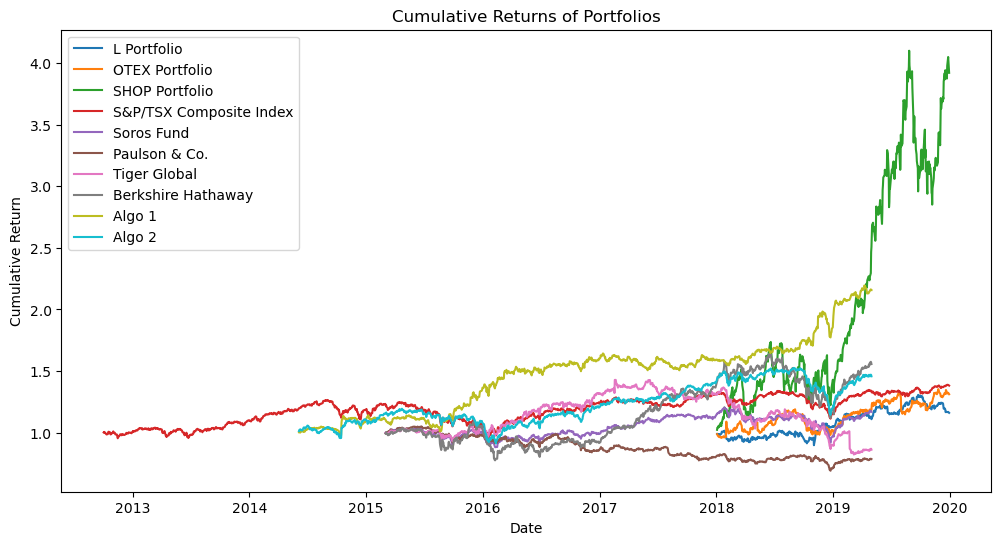

In [18]:
#Plot cumulative returns 
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot cumulative returns for each portfolio
ax.plot(l_cumulative_returns.index, l_cumulative_returns, label='L Portfolio')
ax.plot(otex_cumulative_returns.index, otex_cumulative_returns, label='OTEX Portfolio')
ax.plot(shop_cumulative_returns.index, shop_cumulative_returns, label='SHOP Portfolio')
ax.plot(sp_tsx_cumulative_returns.index, sp_tsx_cumulative_returns, label='S&P/TSX Composite Index')
ax.plot(whale_cumulative_returns.index, whale_cumulative_returns['SOROS FUND MANAGEMENT LLC'], label='Soros Fund')
ax.plot(whale_cumulative_returns.index, whale_cumulative_returns['PAULSON & CO.INC.'], label='Paulson & Co.')
ax.plot(whale_cumulative_returns.index, whale_cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'], label='Tiger Global')
ax.plot(whale_cumulative_returns.index, whale_cumulative_returns['BERKSHIRE HATHAWAY INC'], label='Berkshire Hathaway')
ax.plot(algo_cumulative_returns.index, algo_cumulative_returns['Algo 1'], label='Algo 1')
ax.plot(algo_cumulative_returns.index, algo_cumulative_returns['Algo 2'], label='Algo 2')

# Set plot labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title('Cumulative Returns of Portfolios')
ax.legend()

# Show the plot
plt.show()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


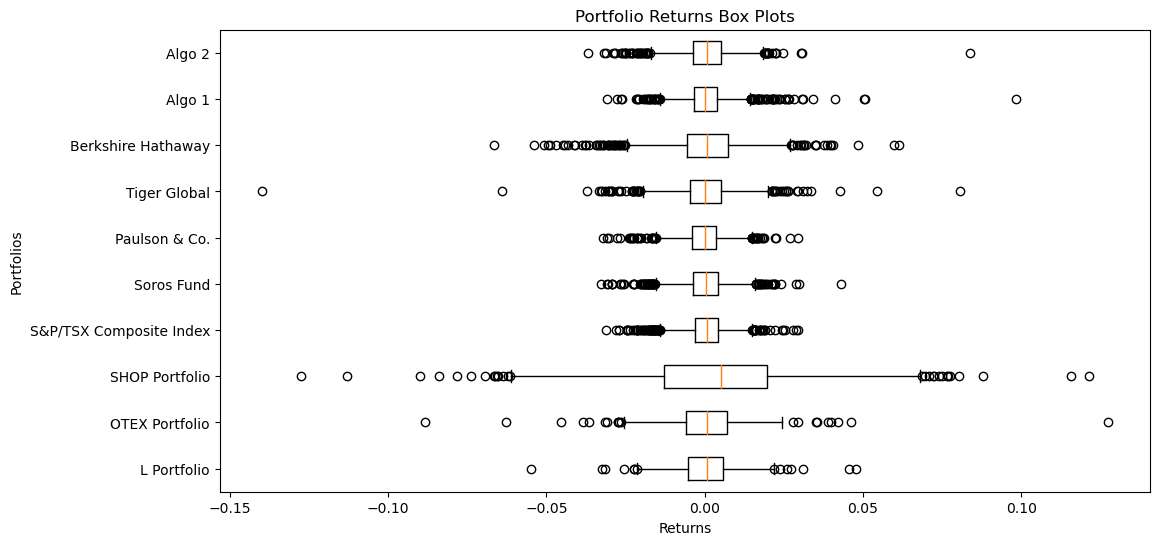

In [19]:
# Box plot to visually show risk
portfolios = {
    'L Portfolio': l_returns,
    'OTEX Portfolio': otex_returns,
    'SHOP Portfolio': shop_returns,
    'S&P/TSX Composite Index' : sp_tsx_returns,
    'Soros Fund': whale_returns['SOROS FUND MANAGEMENT LLC'],
    'Paulson & Co.': whale_returns['PAULSON & CO.INC.'],
    'Tiger Global': whale_returns['TIGER GLOBAL MANAGEMENT LLC'],
    'Berkshire Hathaway': whale_returns['BERKSHIRE HATHAWAY INC'],
    'Algo 1': algo_returns['Algo 1'],
    'Algo 2': algo_returns['Algo 2']
}
# Create a figure and axis for the box plots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot box plots for the data in 'portfolios'
boxplot = ax.boxplot(portfolios.values(), vert=False)
# Set labels for the boxes
ax.set_yticklabels(portfolios.keys())

# Set a title for the plot
ax.set_title('Portfolio Returns Box Plots')

# Add labels to the x-axis and y-axis
ax.set_xlabel('Returns')
ax.set_ylabel('Portfolios')

# Show the plot
plt.show()


### Calculate Standard Deviations

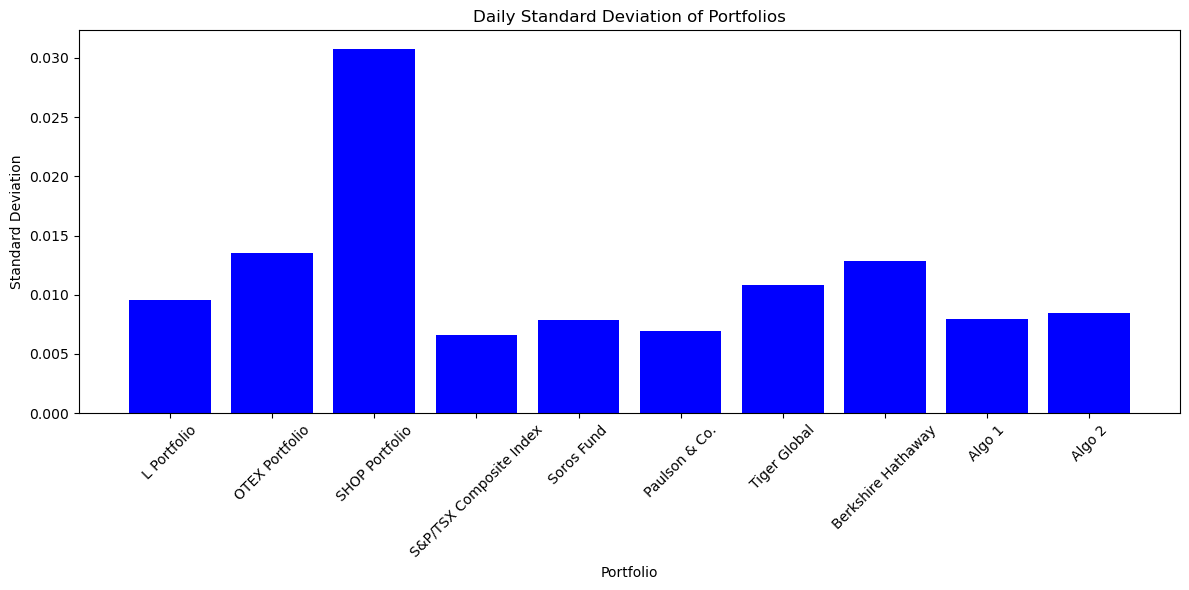

In [20]:
# Calculate the daily standard deviations of all portfolios
std_deviation = {
    'L Portfolio': l_returns.std(),
    'OTEX Portfolio': otex_returns.std(),
    'SHOP Portfolio': shop_returns.std(),
    'S&P/TSX Composite Index' : sp_tsx_returns.std(),
    'Soros Fund': whale_returns['SOROS FUND MANAGEMENT LLC'].std(),
    'Paulson & Co.': whale_returns['PAULSON & CO.INC.'].std(),
    'Tiger Global': whale_returns['TIGER GLOBAL MANAGEMENT LLC'].std(),
    'Berkshire Hathaway': whale_returns['BERKSHIRE HATHAWAY INC'].std(),
    'Algo 1': algo_returns['Algo 1'].std(),
    'Algo 2': algo_returns['Algo 2'].std()
}

# Create a bar plot for standard deviations
plt.figure(figsize=(12, 6))
plt.bar(std_deviation.keys(), std_deviation.values(), color='blue')
plt.xlabel('Portfolio')
plt.ylabel('Standard Deviation')
plt.title('Daily Standard Deviation of Portfolios')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


### Determine which portfolios are riskier than the S&P TSX 60

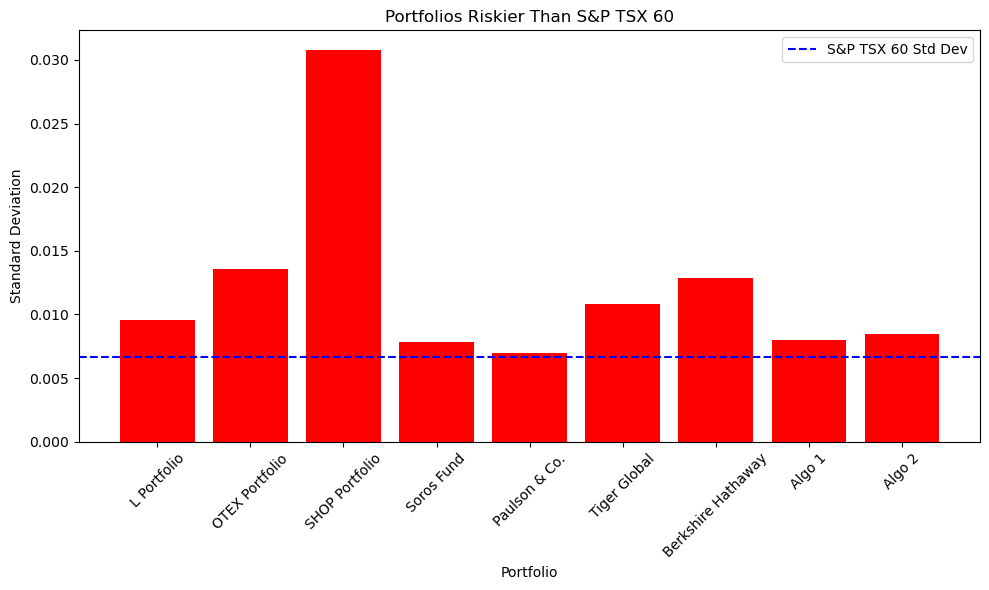

In [21]:
# Calculate the standard deviation of S&P TSX 60
sp_tsx_std_deviation = sp_tsx_history['Close'].pct_change().std()

# Determine which portfolios are riskier than S&P TSX 60
riskier_portfolios = {
    portfolio: std for portfolio, std in std_deviation.items() if std > sp_tsx_std_deviation
}

# Create a bar plot to show the riskier portfolios
plt.figure(figsize=(10, 6))
plt.bar(riskier_portfolios.keys(), riskier_portfolios.values(), color='red')
plt.axhline(y=sp_tsx_std_deviation, color='blue', linestyle='--', label='S&P TSX 60 Std Dev')
plt.xlabel('Portfolio')
plt.ylabel('Standard Deviation')
plt.title('Portfolios Riskier Than S&P TSX 60')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


### Calculate the Annualized Standard Deviation

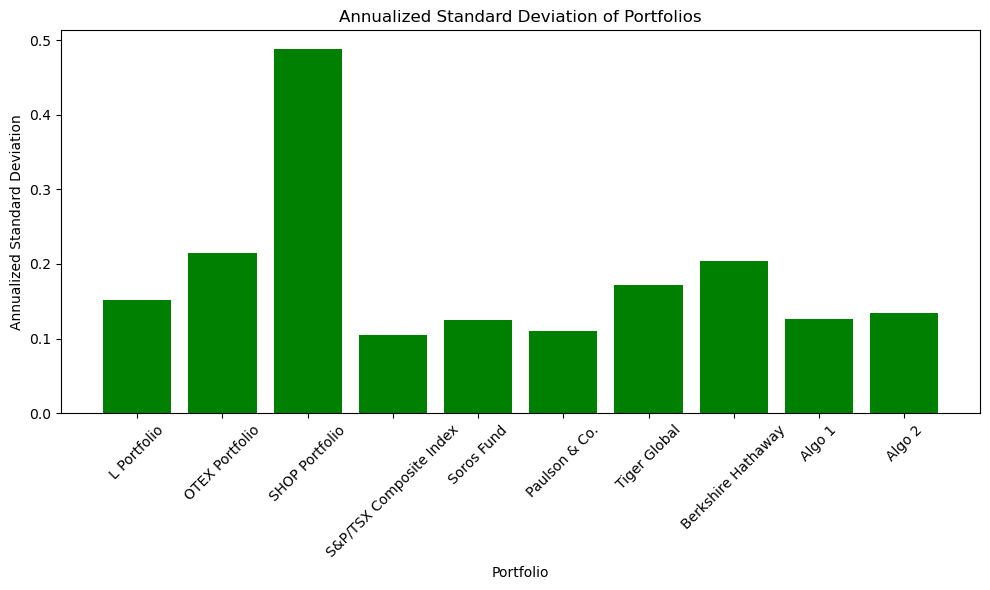

In [22]:
# Calculate the annualized standard deviation for each portfolio
annualized_std_deviation = {
    portfolio: std * (252 ** 0.5) for portfolio, std in std_deviation.items()
}

# Create a bar plot to show the annualized standard deviation
plt.figure(figsize=(10, 6))
plt.bar(annualized_std_deviation.keys(), annualized_std_deviation.values(), color='green')
plt.xlabel('Portfolio')
plt.ylabel('Annualized Standard Deviation')
plt.title('Annualized Standard Deviation of Portfolios')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

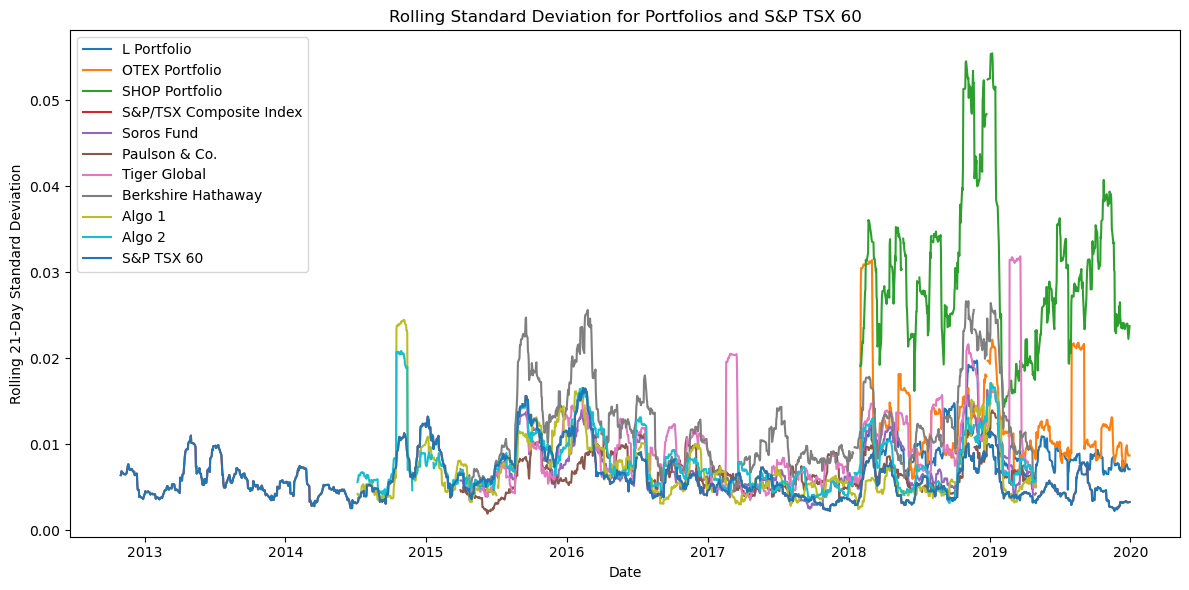

In [23]:
# Calculate rolling standard deviation for all portfolios (21-day window)
rolling_std = {
    'L Portfolio': l_returns.rolling(window=21).std(),
    'OTEX Portfolio': otex_returns.rolling(window=21).std(),
    'SHOP Portfolio': shop_returns.rolling(window=21).std(),
    'S&P/TSX Composite Index' : sp_tsx_returns.rolling(window=21).std(),
    'Soros Fund': whale_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std(),
    'Paulson & Co.': whale_returns['PAULSON & CO.INC.'].rolling(window=21).std(),
    'Tiger Global': whale_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std(),
    'Berkshire Hathaway': whale_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std(),
    'Algo 1': algo_returns['Algo 1'].rolling(window=21).std(),
    'Algo 2': algo_returns['Algo 2'].rolling(window=21).std(),
    'S&P TSX 60': sp_tsx_history['Close'].pct_change().rolling(window=21).std()
}

# Create a DataFrame from rolling standard deviation data
rolling_std_df = pd.DataFrame(rolling_std)

# Plot rolling standard deviation for all portfolios
plt.figure(figsize=(12, 6))
for col in rolling_std_df.columns:
    plt.plot(rolling_std_df.index, rolling_std_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Rolling 21-Day Standard Deviation')
plt.title('Rolling Standard Deviation for Portfolios and S&P TSX 60')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Calculate and plot the correlation

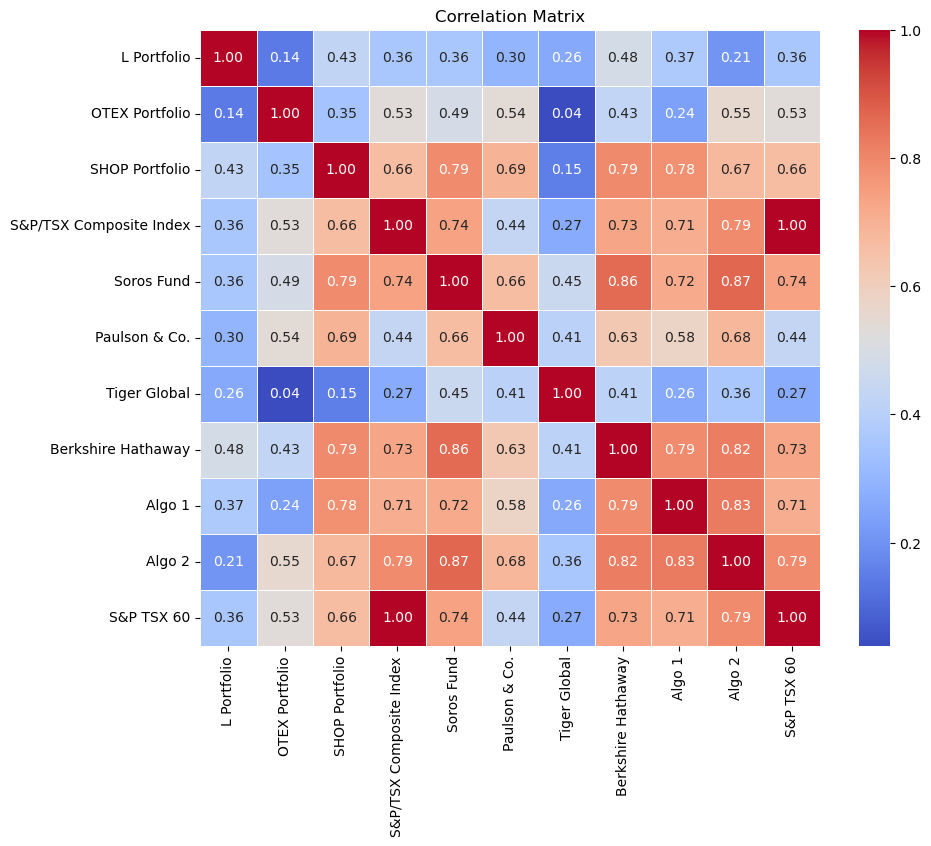

In [24]:
# Calculate the correlation matrix
correlation_matrix = rolling_std_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [70]:
# Calculate daily returns for 'L Portfolio' and 'S&P TSX 60'
daily_returns = rolling_std_df[['L Portfolio', 'S&P TSX 60']]
# Calculate cumulative returns for 'L Portfolio' and 'S&P TSX 60'
cumulative_returns = (1 + daily_returns).cumprod()

# Calculate rolling returns for 'L Portfolio' and 'S&P TSX 60' using a rolling window (e.g., 21 days)
rolling_window = 21
rolling_l_portfolio_returns = daily_returns['L Portfolio'].rolling(window=rolling_window).apply(lambda x: (1 + x).prod() - 1, raw=True)
rolling_sp_tsx_60_returns = daily_returns['S&P TSX 60'].rolling(window=rolling_window).apply(lambda x: (1 + x).prod() - 1, raw=True)

# Remove NaN values
rolling_l_portfolio_returns = rolling_l_portfolio_returns.dropna()
rolling_sp_tsx_60_returns = rolling_sp_tsx_60_returns.dropna()

# Find the common date range
common_dates = rolling_l_portfolio_returns.index.intersection(rolling_sp_tsx_60_returns.index)

# Filter the series to include only the common dates
rolling_l_portfolio_returns = rolling_l_portfolio_returns.loc[common_dates]
rolling_sp_tsx_60_returns = rolling_sp_tsx_60_returns.loc[common_dates]

# Calculate the covariance between the two series
cov_matrix = np.cov(rolling_l_portfolio_returns, rolling_sp_tsx_60_returns)

# Calculate the beta
portfolio_variance = cov_matrix[0, 0]
market_variance = cov_matrix[1, 1]
covariance = cov_matrix[0, 1]
beta = covariance / market_variance

# Plot the portfolio and S&P TSX 60 returns
plt.figure(figsize=(12, 6))
plt.plot(cov_matrix.index, cov_matrix['L Portfolio'], label='L Portfolio Returns', color='blue')
plt.plot(cov_matrix.index, cov_matrix['S&P TSX 60'], label='S&P TSX 60 Returns', color='red')
plt.title('L Portfolio vs. S&P TSX 60 Returns')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(loc='lower left')
plt.grid(True)

# Display the beta value
plt.figtext(0.15, 0.8, f'Beta: {beta:.2f}', fontsize=12, color='green')

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'index'

<Figure size 1200x600 with 0 Axes>

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [71]:
# Load the historical data
L_historical_data = pd.read_csv('./Resources/l_historical.csv', parse_dates=True, index_col="Date")
sp_tsx_history_data = pd.read_csv('./Resources/sp_tsx_history.csv', parse_dates=True, index_col="Date")

# Merge the two dataframes on date
merged_data = pd.merge(L_historical_data, sp_tsx_history_data, how='inner', left_index=True, right_index=True)

# Remove the dollar sign and comma from the "Close" column, and convert it to numeric
merged_data["Close_y"] = merged_data["Close_y"].str.replace('[\$,]', '', regex=True).astype(float)

# Calculate daily returns
merged_data['L_Return'] = merged_data['Close_x'].pct_change()
merged_data['SP_TSX_Return'] = merged_data['Close_y'].pct_change()

# Calculate rolling beta with a 21-day half-life EWMA
rolling_beta_ewma = merged_data['L_Return'].rolling(window=window).cov(merged_data['SP_TSX_Return']) / merged_data['SP_TSX_Return'].rolling(window=window).var()

# Plot the rolling beta
plt.figure(figsize=(12, 6))
plt.plot(rolling_beta_ewma.index, rolling_beta_ewma, label='21-Day Rolling Beta (EWMA)')
plt.title('21-Day Rolling Beta (EWMA) for Stock (L) vs. S&P TSX 60')
plt.xlabel('Date')
plt.ylabel('Rolling Beta (EWMA)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'window' is not defined

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
# Calculate annualized Sharpe Ratios for each portfolio
# Assuming a risk-free rate of 0 for this example
risk_free_rate = 0

# Define the number of trading days in a year
trading_days_per_year = 252

# Calculate the mean returns and standard deviation of returns for each portfolio
l_mean_return = l_returns.mean()
otex_mean_return = otex_returns.mean()
shop_mean_return = shop_returns.mean()
sp_tsx_mean_return = sp_tsx_returns.mean()
whale_mean_return = whale_returns.mean()
algo_mean_return = algo_returns.mean()

l_std_dev = l_returns.std()
otex_std_dev = otex_returns.std()
shop_std_dev = shop_returns.std()
sp_tsx_std_dev = sp_tsx_returns.std()
whale_std_dev = whale_returns.std()
algo_std_dev = algo_returns.std()

# Calculate the Sharpe Ratios
l_sharpe_ratio = (l_mean_return - risk_free_rate) / (l_std_dev * np.sqrt(trading_days_per_year))
otex_sharpe_ratio = (otex_mean_return - risk_free_rate) / (otex_std_dev * np.sqrt(trading_days_per_year))
shop_sharpe_ratio = (shop_mean_return - risk_free_rate) / (shop_std_dev * np.sqrt(trading_days_per_year))
sp_tsx_sharpe_ratio = (sp_tsx_mean_return - risk_free_rate) / (sp_tsx_std_dev * np.sqrt(trading_days_per_year))
whale_sharpe_ratio = (whale_mean_return - risk_free_rate) / (whale_std_dev * np.sqrt(trading_days_per_year))
algo_sharpe_ratio = (algo_mean_return - risk_free_rate) / (algo_std_dev * np.sqrt(trading_days_per_year))

print("Sharpe Ratios:")
print("L Portfolio:", l_sharpe_ratio)
print("OTEX Portfolio:", otex_sharpe_ratio)
print("SHOP Portfolio:", shop_sharpe_ratio)
print("S&P/TSX Composite Index:", sp_tsx_sharpe_ratio)
print("Whale Returns Portfolio:", whale_sharpe_ratio)
print("Algo Returns Portfolio:", algo_sharpe_ratio)

Sharpe Ratios:
L Portfolio: 0.0022622379167783844
OTEX Portfolio: 0.002950443164989791
SHOP Portfolio: 0.006569497553815605
S&P/TSX Composite Index: 0.0019002635624884101
Whale Returns Portfolio: SOROS FUND MANAGEMENT LLC      0.001435
PAULSON & CO.INC.             -0.001834
TIGER GLOBAL MANAGEMENT LLC   -0.000469
BERKSHIRE HATHAWAY INC         0.002459
dtype: float64
Algo Returns Portfolio: Algo 1    0.005159
Algo 2    0.002537
dtype: float64


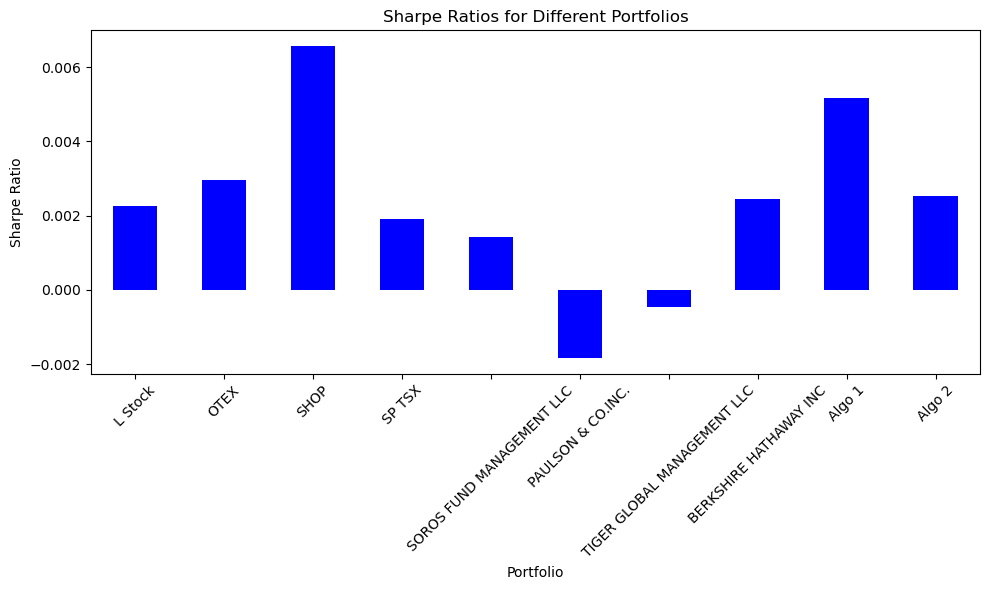

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios = pd.Series({
    'L Stock': l_sharpe_ratio,
    'OTEX': otex_sharpe_ratio,
    'SHOP': shop_sharpe_ratio,
    'SP TSX' : sp_tsx_sharpe_ratio, 
    'SOROS FUND MANAGEMENT LLC': whale_sharpe_ratio['SOROS FUND MANAGEMENT LLC'],
    'PAULSON & CO.INC.': whale_sharpe_ratio['PAULSON & CO.INC.'],
    'TIGER GLOBAL MANAGEMENT LLC': whale_sharpe_ratio['TIGER GLOBAL MANAGEMENT LLC'],
    'BERKSHIRE HATHAWAY INC': whale_sharpe_ratio['BERKSHIRE HATHAWAY INC'],
    'Algo 1': algo_sharpe_ratio['Algo 1'],
    'Algo 2': algo_sharpe_ratio['Algo 2']
})

# Create a bar plot
plt.figure(figsize=(10, 6))
sharpe_ratios.plot(kind='bar', color='blue')
plt.title('Sharpe Ratios for Different Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---
Yes

Interpretation:
- A positive Sharpe ratio indicates that the investment has generated a return higher than the risk-free rate per unit of risk taken.
- A higher Sharpe ratio suggests better risk-adjusted performance.
- The Sharpe ratio allows you to compare different investments or portfolios. The one with the highest Sharpe ratio is generally considered the best risk-adjusted investment.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
soros_data = whale_returns['SOROS FUND MANAGEMENT LLC']
soros_data

Date
2015-03-03   -0.001266
2015-03-04    0.002230
2015-03-05    0.004016
2015-03-06   -0.007905
2015-03-09    0.000582
                ...   
2019-04-25   -0.000285
2019-04-26    0.008149
2019-04-29    0.001254
2019-04-30   -0.001295
2019-05-01   -0.005847
Name: SOROS FUND MANAGEMENT LLC, Length: 1059, dtype: float64

In [30]:
# Reading data from 2nd stock
paulson_data = whale_returns['PAULSON & CO.INC.']
paulson_data

Date
2015-03-03   -0.004981
2015-03-04    0.003241
2015-03-05    0.004076
2015-03-06   -0.003574
2015-03-09    0.004225
                ...   
2019-04-25   -0.001291
2019-04-26    0.009162
2019-04-29    0.002719
2019-04-30   -0.002211
2019-05-01   -0.001341
Name: PAULSON & CO.INC., Length: 1059, dtype: float64

In [31]:
# Reading data from 3rd stock
tiger_global_data = whale_returns['TIGER GLOBAL MANAGEMENT LLC']
tiger_global_data

Date
2015-03-03   -0.000496
2015-03-04   -0.002534
2015-03-05    0.002355
2015-03-06   -0.008481
2015-03-09    0.005843
                ...   
2019-04-25   -0.005153
2019-04-26    0.012355
2019-04-29    0.006251
2019-04-30   -0.000259
2019-05-01   -0.007936
Name: TIGER GLOBAL MANAGEMENT LLC, Length: 1059, dtype: float64

In [32]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat([soros_data, paulson_data, tiger_global_data], axis=1)
# Rename the columns for clarity
combined_data.columns = ['SOROS', 'PAULSON', 'TIGER GLOBAL']
combined_data

,SOROS,PAULSON,TIGER GLOBAL
Date,,,
2015-03-03,-0.001266,-0.004981,-0.000496
2015-03-04,0.002230,0.003241,-0.002534
2015-03-05,0.004016,0.004076,0.002355
2015-03-06,-0.007905,-0.003574,-0.008481
2015-03-09,0.000582,0.004225,0.005843
...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153
2019-04-26,0.008149,0.009162,0.012355
2019-04-29,0.001254,0.002719,0.006251


In [ ]:
# Reset Date index
# combined_data.reset_index(drop=True, inplace=True)
# combined_data

In [33]:
# Reorganize portfolio data by having a column per symbol
combined_data.head()

,SOROS,PAULSON,TIGER GLOBAL
Date,,,
2015-03-03,-0.001266,-0.004981,-0.000496
2015-03-04,0.002230,0.003241,-0.002534
2015-03-05,0.004016,0.004076,0.002355
2015-03-06,-0.007905,-0.003574,-0.008481
2015-03-09,0.000582,0.004225,0.005843


In [42]:
# Calculate daily returns
portfolio_returns = combined_data
# Drop NAs
portfolio_returns.dropna(inplace=True)
# Display sample data
portfolio_returns

,SOROS,PAULSON,TIGER GLOBAL
Date,,,
2015-03-03,-0.001266,-0.004981,-0.000496
2015-03-04,0.002230,0.003241,-0.002534
2015-03-05,0.004016,0.004076,0.002355
2015-03-06,-0.007905,-0.003574,-0.008481
2015-03-09,0.000582,0.004225,0.005843
...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153
2019-04-26,0.008149,0.009162,0.012355
2019-04-29,0.001254,0.002719,0.006251


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [43]:
# Set weights
weights = [1/3, 1/3, 1/3]
# weighted_returns = portfolio_returns[['SOROS', 'PAULSON', 'TIGER GLOBAL']] * weights
weighted_returns = portfolio_returns.dot(weights)

# Calculate portfolio return
# portfolio_daily_return = weighted_returns.sum(axis=1)

# Display sample data
weighted_returns

Date
2015-03-03   -0.002247
2015-03-04    0.000979
2015-03-05    0.003482
2015-03-06   -0.006654
2015-03-09    0.003550
                ...   
2019-04-25   -0.002243
2019-04-26    0.009889
2019-04-29    0.003408
2019-04-30   -0.001255
2019-05-01   -0.005042
Length: 1059, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [44]:
whale_returns['custom portfolio'] = weighted_returns

In [45]:
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,custom portfolio
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.002247
2015-03-04,0.002230,0.003241,-0.002534,0.004213,0.000979
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.003482
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.006654
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003550
...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,-0.002243
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.009889
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.003408


In [47]:
# Join your returns DataFrame to the original returns DataFrame
whale_returns['custom portfolio'] = weighted_returns
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,custom portfolio
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.002247
2015-03-04,0.002230,0.003241,-0.002534,0.004213,0.000979
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.003482
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.006654
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003550
...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,-0.002243
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.009889
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.003408


In [53]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,custom portfolio
Date,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.002247
2015-03-04,0.002230,0.003241,-0.002534,0.004213,0.000979
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.003482
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.006654
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.003550
...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,-0.002243
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.009889
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.003408


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [57]:
# Calculate the annualized `std`
daily_std = whale_returns['custom portfolio'].std()
trading_days_per_year = 252
annualized_std = daily_std * np.sqrt(trading_days_per_year)
print("Annualized Standard Deviation:", annualized_std)

Annualized Standard Deviation: 0.11411425704495795


### Calculate and plot rolling `std` with 21-day window

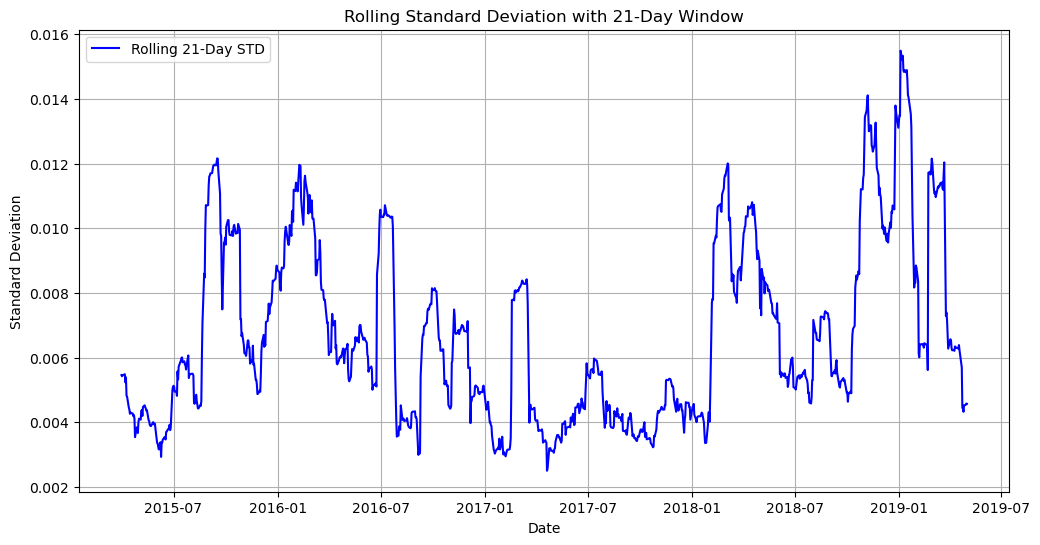

In [62]:
# Calculate rolling standard deviation
rolling_std = whale_returns['custom portfolio'].rolling(window=21).std()
rolling_std.dropna(inplace=True)
rolling_std
# Plot rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(rolling_std, label='Rolling 21-Day STD', color='blue')
plt.title('Rolling Standard Deviation with 21-Day Window')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

### Calculate and plot the correlation

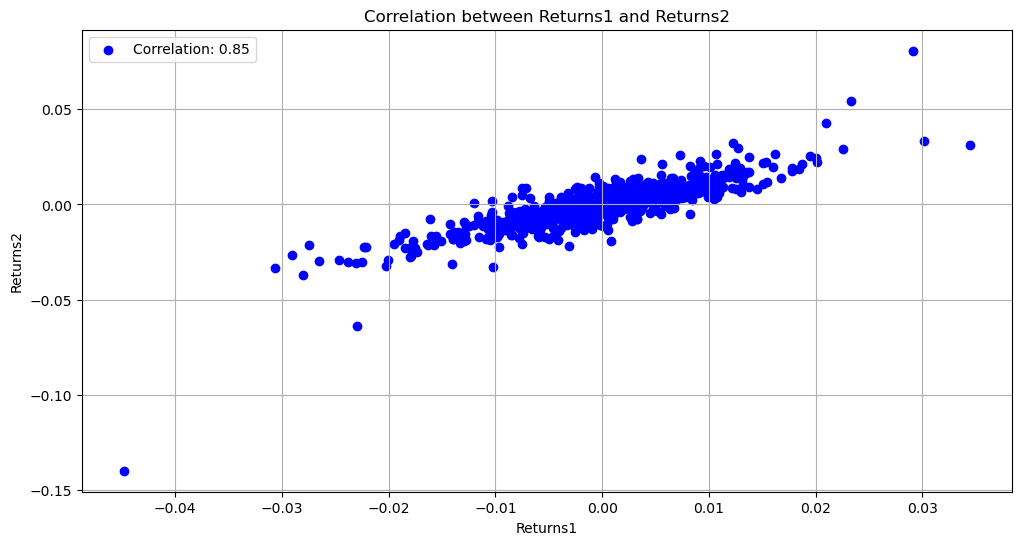

In [66]:
# Calculate and plot the correlation
correlation = whale_returns['custom portfolio'].corr(whale_returns['TIGER GLOBAL MANAGEMENT LLC'])

plt.figure(figsize=(12, 6))
plt.scatter(whale_returns['custom portfolio'], whale_returns['TIGER GLOBAL MANAGEMENT LLC'], label=f'Correlation: {correlation:.2f}', color='blue')
plt.title('Correlation between Returns1 and Returns2')
plt.xlabel('Returns1')
plt.ylabel('Returns2')
plt.legend()
plt.grid(True)
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

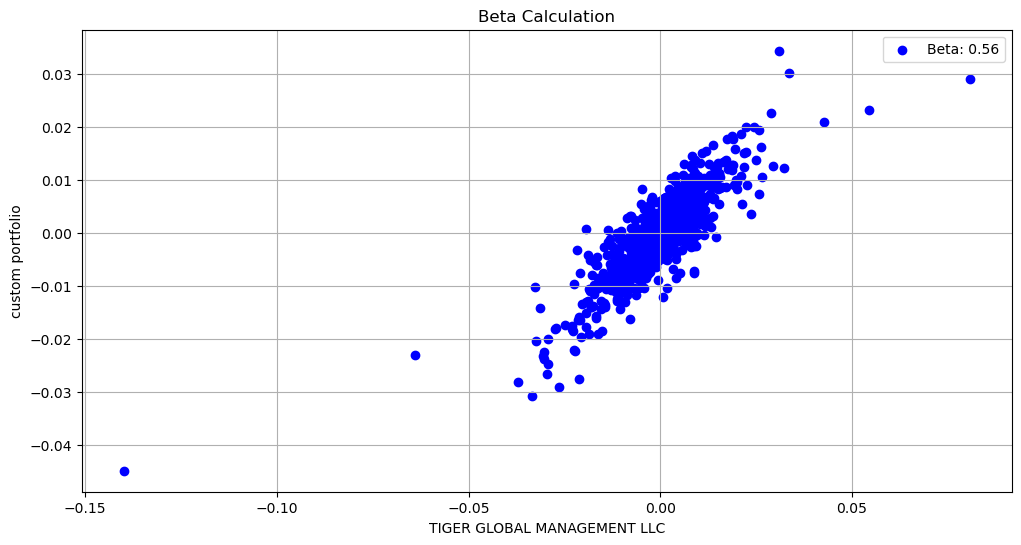

Beta: 0.56


In [76]:
# Calculate and plot Beta
covariance = whale_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(whale_returns['custom portfolio'])
variance_market = whale_returns['TIGER GLOBAL MANAGEMENT LLC'].var()
beta = covariance / variance_market
plt.figure(figsize=(12, 6))
plt.scatter(whale_returns['TIGER GLOBAL MANAGEMENT LLC'], whale_returns['custom portfolio'], label=f'Beta: {beta:.2f}', color='blue')
plt.title('Beta Calculation')
plt.xlabel('TIGER GLOBAL MANAGEMENT LLC')
plt.ylabel('custom portfolio')
plt.legend()
plt.grid(True)
plt.show()

print(f'Beta: {beta:.2f}')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [79]:
# Calculate Annualized Sharpe Ratios
risk_free_rate = 0.02
mean_return = whale_returns['custom portfolio'].mean()
volatility = whale_returns['custom portfolio'].std()
# Calculate the annualized Sharpe Ratio
annualized_sharpe_ratio = (mean_return - risk_free_rate) / (volatility * np.sqrt(252))
print(f'Annualized Sharpe Ratio: {annualized_sharpe_ratio:.2f}')

Annualized Sharpe Ratio: -0.18


In [80]:
# Visualize the sharpe ratios as a bar plot
whale_returns.sort_values(by='Sharpe_Ratio', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.bar(whale_returns['custom portfolio'], whale_returns['Sharpe_Ratio'], color='skyblue')
plt.title('Sharpe Ratios of Different Assets')
plt.xlabel('custom portfolio')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: 'Sharpe_Ratio'

### How does your portfolio do?

Write your answer here!